In [7]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
df = pd.read_csv('uber_ncr_ride_bookings.csv')
print(df)


              Date      Time    Booking ID   Booking Status   Customer ID  \
0       2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1       2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2       2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3       2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4       2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   
...            ...       ...           ...              ...           ...   
149995  2024-11-11  19:34:01  "CNR6500631"        Completed  "CID4337371"   
149996  2024-11-24  15:55:09  "CNR2468611"        Completed  "CID2325623"   
149997  2024-09-18  10:55:15  "CNR6358306"        Completed  "CID9925486"   
149998  2024-10-05  07:53:34  "CNR3030099"        Completed  "CID9415487"   
149999  2024-03-10  15:38:03  "CNR3447390"        Completed  "CID4108667"   

         Vehicle Type         Pickup Location      Drop Location  Avg VTAT 

In [17]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method = 'pearson')
print("Correlation Matrix of all numeric columns:")
print(correlation_matrix)
columns_to_analyze = ['Booking Value', 'Customer Rating', 'Driver Ratings']

# Check which columns actually exist in your dataframe
existing_columns = [col for col in columns_to_analyze if col in df.columns]

if existing_columns:
    # Check if these columns are numeric
    numeric_columns = []
    for col in existing_columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_columns.append(col)
        else:
            print(f"Column '{col}' is not numeric. Converting if possible...")
            try:
                df[col] = pd.to_numeric(df[col], errors='coerce')
                if not df[col].isnull().all():
                    numeric_columns.append(col)
                else:
                    print(f"Could not convert '{col}' to numeric.")
            except:
                print(f"Failed to convert '{col}' to numeric.")

    if len(numeric_columns) >= 2:
        correlation_matrix = df[numeric_columns].corr()
        print("\nCorrelation Matrix:")
        print(correlation_matrix)
    else:
        print("Not enough numeric columns for correlation analysis.")
else:
    print("None of the specified columns found. Available columns:")
    print(df.columns.tolist())

Correlation Matrix of all numeric columns:
                             Avg VTAT  Avg CTAT  Cancelled Rides by Customer  \
Avg VTAT                     1.000000  0.062175                          NaN   
Avg CTAT                     0.062175  1.000000                          NaN   
Cancelled Rides by Customer       NaN       NaN                          NaN   
Cancelled Rides by Driver         NaN       NaN                          NaN   
Incomplete Rides                  NaN       NaN                          NaN   
Booking Value                0.002259  0.000216                          NaN   
Ride Distance                0.063005  0.101503                          NaN   
Driver Ratings              -0.005439  0.000807                          NaN   
Customer Rating             -0.003945  0.001000                          NaN   

                             Cancelled Rides by Driver  Incomplete Rides  \
Avg VTAT                                           NaN               NaN   
Avg 

In [3]:
df.to_csv("sample.csv", columns=['Date','Booking ID'])

In [4]:
df['booking_code'] = df['Booking ID'].str.extract(r'([A-Za-z]+)')
df['booking_number'] = df['Booking ID'].str.extract(r'(\d+)').astype(int)
df['duplicate_count'] = df['booking_code'].duplicated().sum()
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,booking_code,booking_number,duplicate_count
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CNR,5884300,149999
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,CNR,1326809,149999
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,CNR,8494506,149999
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,416.0,34.02,4.6,5.0,UPI,CNR,8906825,149999
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,737.0,48.21,4.1,4.3,UPI,CNR,1950162,149999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet,CNR,6500631,149999
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,1093.0,21.31,4.8,5.0,UPI,CNR,2468611,149999
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,852.0,15.93,3.9,4.4,Cash,CNR,6358306,149999
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,333.0,45.54,4.1,3.7,UPI,CNR,3030099,149999


In [5]:
# Group by booking_code and count occurrences
grouped = df.groupby('booking_code').size().reset_index(name='count')
duplicate_groups = grouped[grouped['count'] > 1]

print("Booking codes with duplicates:")
print(duplicate_groups)

# Total rows that are duplicates
total_duplicate_rows = duplicate_groups['count'].sum() - len(duplicate_groups)
print(f"\nTotal duplicate rows: {total_duplicate_rows}")

Booking codes with duplicates:
  booking_code   count
0          CNR  150000

Total duplicate rows: 149999


In [6]:
print(df.isnull().sum())

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
booking_code                              0
booking_number                  

Text(0.5, 0, 'payment method')

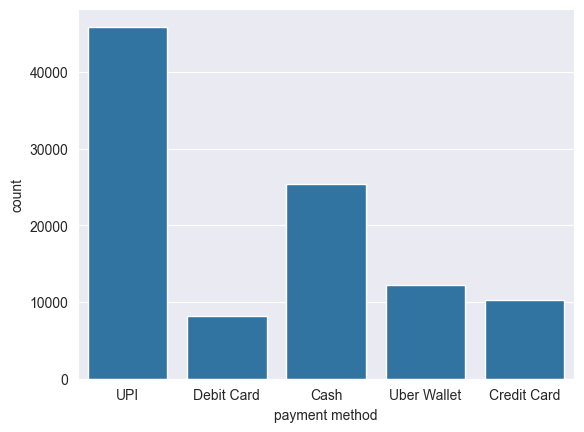

In [7]:
sns.countplot(x=df['Payment Method'])
plt.xlabel("payment method")

Text(0.5, 0, 'Vehicle Type')

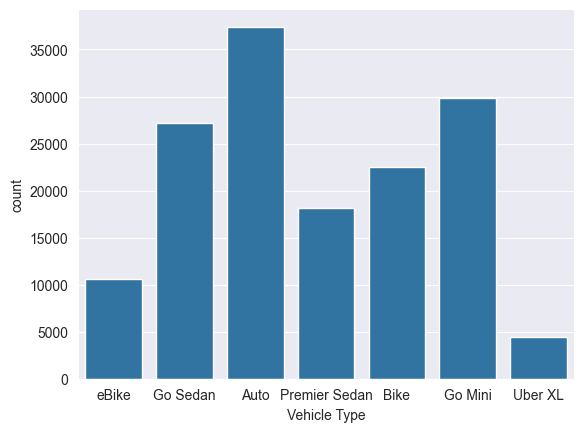

In [8]:
sns.countplot(x=df['Vehicle Type'])
plt.xlabel("Vehicle Type")

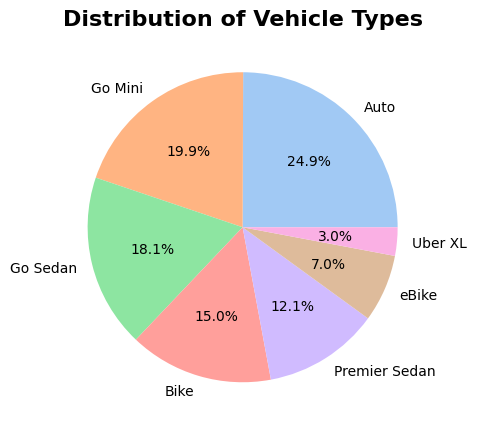

In [9]:
plt.style.use('default')
sns.set_palette("pastel")

# Assuming your DataFrame is named 'df' and column is 'vehicle_type'
vehicle_counts = df['Vehicle Type'].value_counts()

# Create pie chart
plt.figure(figsize=(5, 8))
plt.pie(vehicle_counts.values, labels=vehicle_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Vehicle Types', fontsize=16, fontweight='bold')
plt.show()

<Axes: xlabel='Customer Rating', ylabel='Driver Ratings'>

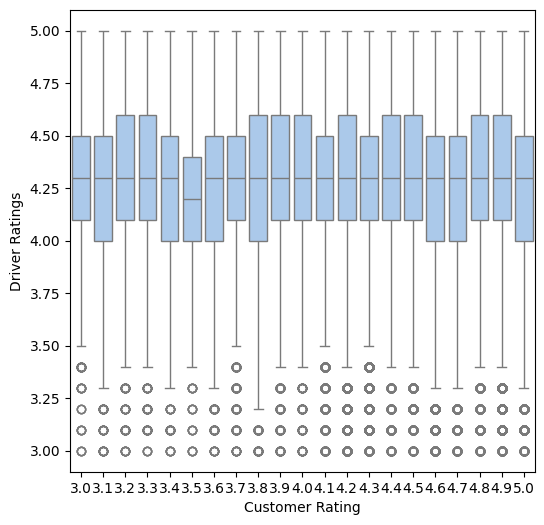

In [16]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'Customer Rating', y = 'Driver Ratings', data = df)

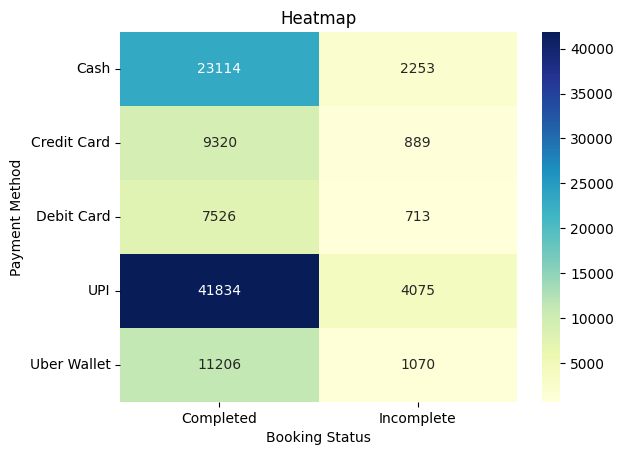

In [17]:
pivot_table = df.pivot_table(index='Payment Method', columns='Booking Status', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Booking Status')
plt.ylabel('Payment Method')
plt.show()

In [30]:
max_ride_distance = df['Ride Distance'].max()
uber_rides_with_max_distance = df.loc[df['Ride Distance'] == max_ride_distance, 'Vehicle Type']
print('max_ride_distance:')
print(uber_rides_with_max_distance)

max_ride_distance:
5480      Go Sedan
40358         Bike
72284     Go Sedan
81910     Go Sedan
85964         Auto
86963         Auto
88732      Go Mini
119632        Auto
145409     Go Mini
Name: Vehicle Type, dtype: object
